In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from functions import loadDataFrame

import statsmodels.api as sm
import statsmodels.formula.api as smf
import ast
import re
from scipy.stats import ttest_rel
from scipy import stats
from scipy.stats import t
from itertools import combinations

# Plot styling and scaling
# sns.set_theme(style="whitegrid")
# plt.rcParams.update({
#     "figure.figsize": (10, 4),
#     "figure.dpi": 120,
#     "font.size": 12,
#     "axes.titlesize": 14,
#     "axes.labelsize": 12,
#     "xtick.labelsize": 10,
#     "ytick.labelsize": 10,
#     "legend.fontsize": 10
# })
# FIGSIZE_WIDE = (12, 4)
# FIGSIZE_NARROW = (8, 3)
# FIGSIZE_SQUARE = (6, 6)


### Load data

In [2]:
names = [
    'Carl',
         'Erik',
         'Ali',
        'Kasper'
        
           ]
df = pd.DataFrame()
for name in names:
    df2 = loadDataFrame(name+'/eksperiment1.csv')
    df = pd.concat([df, df2], ignore_index=True)



# df = loadDataFrame("Ali/eksperkment1.csv", convertToInt=True)

Wait:  0.5  Accuracy:  0.24285714285714285


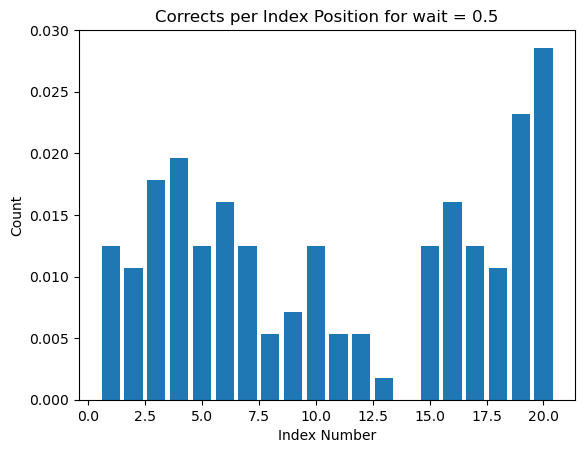

Wait:  1.0  Accuracy:  0.2857142857142857


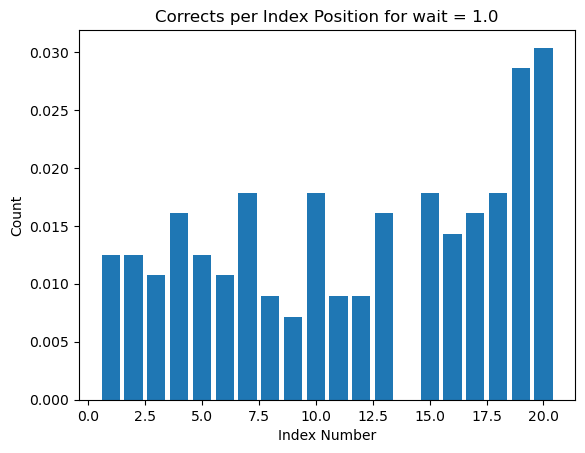

Wait:  1.5  Accuracy:  0.3326923076923077


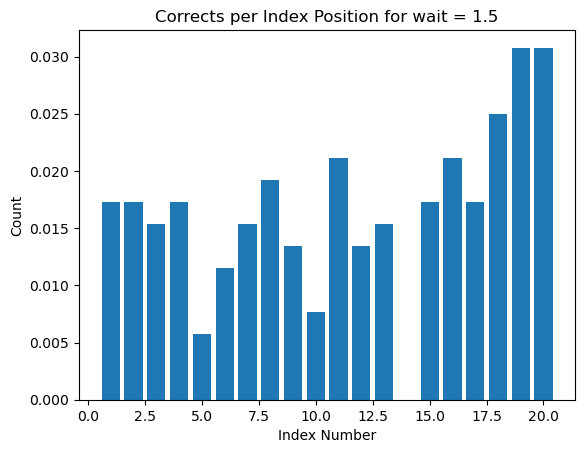

Wait:  2.5  Accuracy:  0.3875


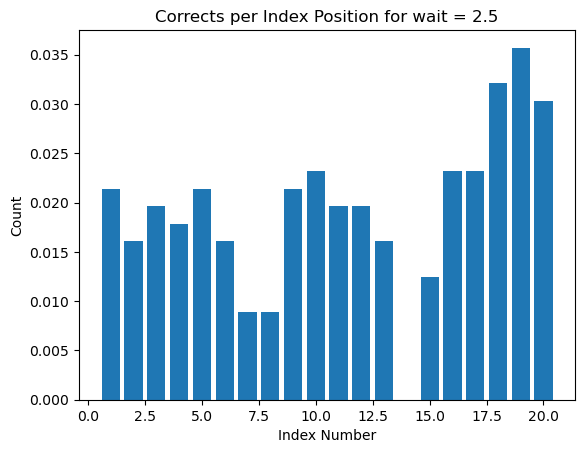

Wait:  4.0  Accuracy:  0.4089285714285714


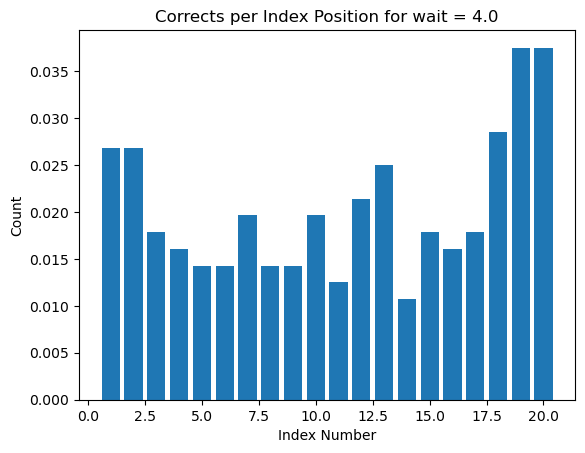

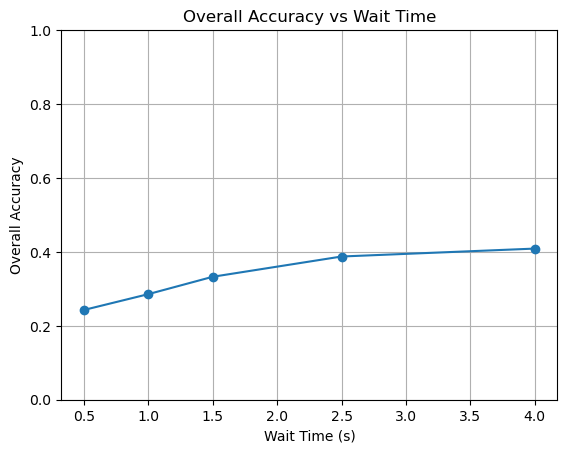

In [3]:
waits = df['wait'].unique()
waitAccuracies = []
for wait in waits:
    df2 = df[df['wait'] == wait]


    indexCorrects = np.zeros(20)
    for idx, row in df2.iterrows():
        # print(row['correctSequence'])
        # print(row['userInput'])
        userAnswered = row['userInput']
        for i, char in enumerate(row['correctSequence']):
            # print(char)
            if char in userAnswered:
                indexCorrects[i] += 1


    accuracy = np.sum(indexCorrects)/ (len(df2) * 20)
    waitAccuracies.append((wait, accuracy))
    print("Wait: ", wait, " Accuracy: ", accuracy)
    normalizedCorrects = indexCorrects / (len(df2) * 20)
    plt.bar(np.arange(1, 21), normalizedCorrects)
    plt.xlabel('Index Number')
    plt.ylabel('Count')
    plt.title('Corrects per Index Position for wait = '+str(wait))
    plt.show()

plt.plot(waits, [x[1] for x in waitAccuracies], marker='o')
plt.xlabel('Wait Time (s)')
plt.ylabel('Overall Accuracy')
plt.title('Overall Accuracy vs Wait Time')
plt.ylim(0, 1)
plt.grid()
plt.show()

Wait: 0.5, Primacy: 0.298, Middle: 0.125, Recency: 0.345


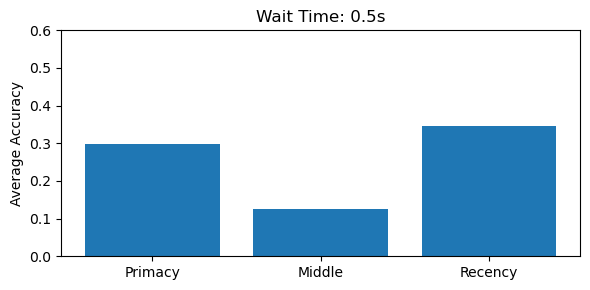

Wait: 1.0, Primacy: 0.250, Middle: 0.214, Recency: 0.417


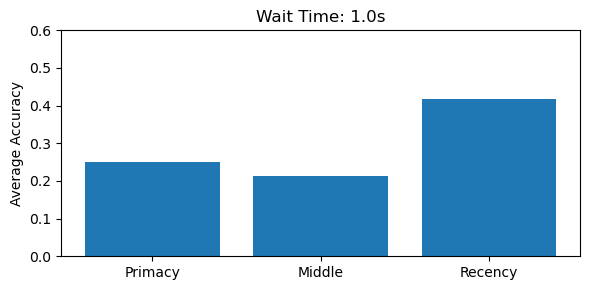

Wait: 1.5, Primacy: 0.282, Middle: 0.264, Recency: 0.474


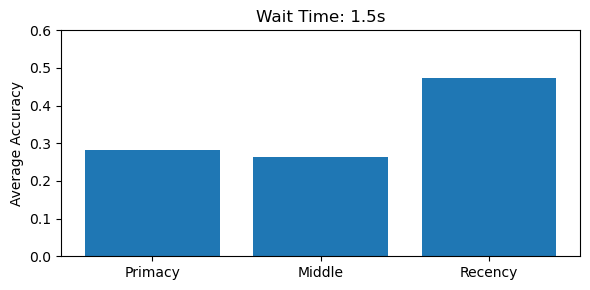

Wait: 2.5, Primacy: 0.375, Middle: 0.295, Recency: 0.524


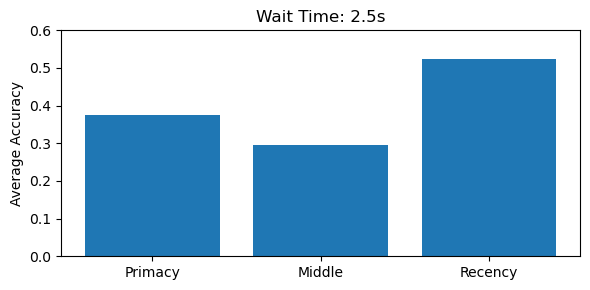

Wait: 4.0, Primacy: 0.387, Middle: 0.344, Recency: 0.518


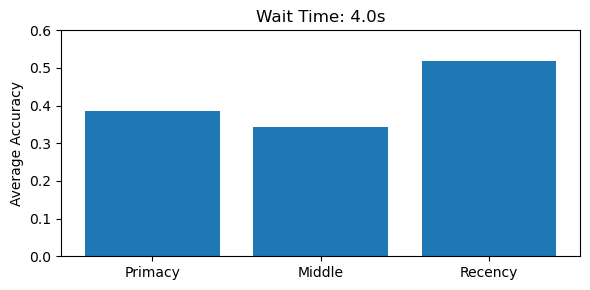

In [7]:
# Primacy and Recency Effect Analysis
primacy_indices = list(range(6))  # First 6 items
middle_indices = list(range(6, 14))  # Middle 8 items
recency_indices = list(range(14, 20))  # Last 6 items
primacy_scores = []
recency_scores = []
middle_scores = []

for wait in waits:
    df2 = df[df['wait'] == wait]
    indexCorrects = np.zeros(20)
    for idx, row in df2.iterrows():
        userAnswered = row['userInput']
        for i, char in enumerate(row['correctSequence']):
            if char in userAnswered:
                indexCorrects[i] += 1
    normalizedCorrects = indexCorrects / (len(df2))
    primacy_scores.append(np.mean(normalizedCorrects[primacy_indices]))
    middle_scores.append(np.mean(normalizedCorrects[middle_indices]))
    recency_scores.append(np.mean(normalizedCorrects[recency_indices]))
    print(f"Wait: {wait}, Primacy: {primacy_scores[-1]:.3f}, Middle: {middle_scores[-1]:.3f}, Recency: {recency_scores[-1]:.3f}")
    # Bar plot for primacy, middle, and recency
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(['Primacy', 'Middle', 'Recency'], [primacy_scores[-1], middle_scores[-1], recency_scores[-1]])
    ax.set_ylim(0, 0.6)
    ax.set_title(f'Wait Time: {wait}s')
    ax.set_ylabel('Average Accuracy')
    fig.tight_layout()
    plt.show()
    


Wait: 0.5, Primacy: 0.298, Middle: 0.125, Recency: 0.345


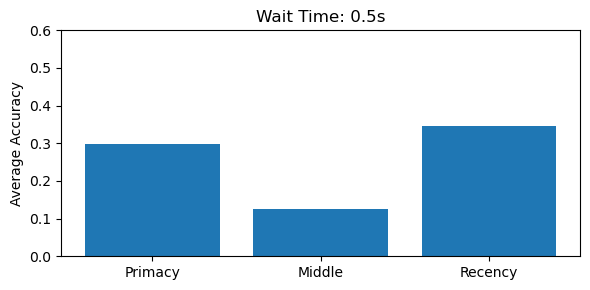

Wait: 1.0, Primacy: 0.250, Middle: 0.214, Recency: 0.417


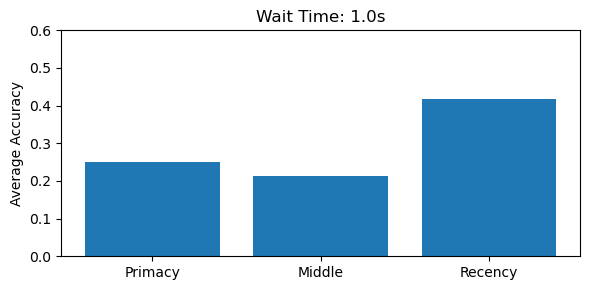

Wait: 1.5, Primacy: 0.282, Middle: 0.264, Recency: 0.474


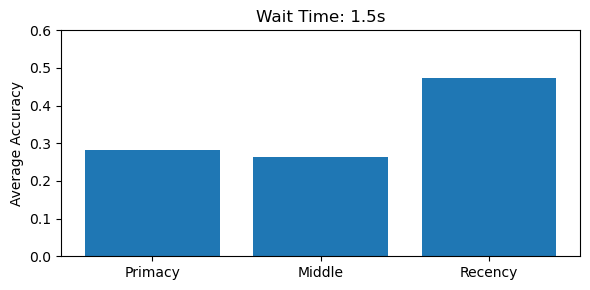

Wait: 2.5, Primacy: 0.375, Middle: 0.295, Recency: 0.524


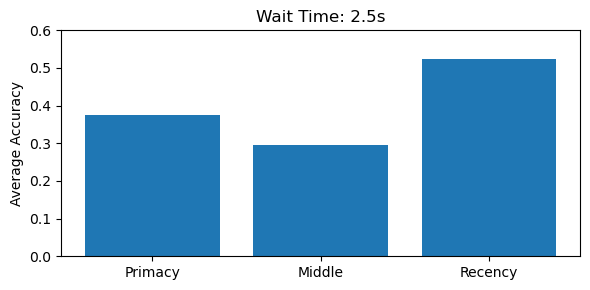

Wait: 4.0, Primacy: 0.387, Middle: 0.344, Recency: 0.518


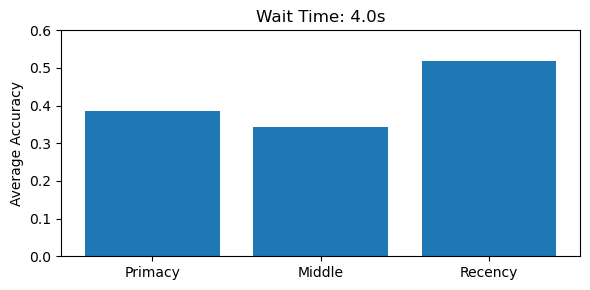


STATISTICAL ANALYSIS FOR 0.5s CONDITION
Using Bonferroni-corrected alpha: 0.025

1. Recency vs Middle:
   Recency M = 0.345, Middle M = 0.125
   t(27) = 4.206, p = 0.0003
   Significant: True

2. Primacy vs Middle:
   Primacy M = 0.298, Middle M = 0.125
   t(27) = 3.575, p = 0.0013
   Significant: True

3. Recency vs Primacy (exploratory):
   Recency M = 0.345, Primacy M = 0.298
   t(27) = 0.849, p = 0.4036
   Significant: False

Sample size (number of participants): N = 28


In [9]:
participant_data = {}

for wait in waits:
    df2 = df[df['wait'] == wait]
    participant_data[wait] = {'primacy': [], 'middle': [], 'recency': []}
    
    for idx, row in df2.iterrows():
        userAnswered = row['userInput']
        individual_corrects = np.zeros(20)
        
        for i, char in enumerate(row['correctSequence']):
            if char in userAnswered:
                individual_corrects[i] = 1  # 1 if correct, 0 if wrong
        
        # Calculate average accuracy for this participant in each region
        primacy_acc = np.mean(individual_corrects[primacy_indices])
        middle_acc = np.mean(individual_corrects[middle_indices])
        recency_acc = np.mean(individual_corrects[recency_indices])
        
        participant_data[wait]['primacy'].append(primacy_acc)
        participant_data[wait]['middle'].append(middle_acc)
        participant_data[wait]['recency'].append(recency_acc)
    
    # Your existing code for group averages and plotting
    indexCorrects = np.zeros(20)
    for idx, row in df2.iterrows():
        userAnswered = row['userInput']
        for i, char in enumerate(row['correctSequence']):
            if char in userAnswered:
                indexCorrects[i] += 1
    normalizedCorrects = indexCorrects / len(df2)
    
    primacy_avg = np.mean(normalizedCorrects[primacy_indices])
    middle_avg = np.mean(normalizedCorrects[middle_indices])
    recency_avg = np.mean(normalizedCorrects[recency_indices])
    
    print(f"Wait: {wait}, Primacy: {primacy_avg:.3f}, Middle: {middle_avg:.3f}, Recency: {recency_avg:.3f}")
    
    # Bar plot
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(['Primacy', 'Middle', 'Recency'], [primacy_avg, middle_avg, recency_avg])
    ax.set_ylim(0, 0.6)
    ax.set_title(f'Wait Time: {wait}s')
    ax.set_ylabel('Average Accuracy')
    fig.tight_layout()
    plt.show()

# Now perform statistical tests for the 0.5s condition
print("\n" + "="*60)
print("STATISTICAL ANALYSIS FOR 0.5s CONDITION")
print("="*60)

wait_05_data = participant_data[0.5]
primacy_scores = np.array(wait_05_data['primacy'])
middle_scores = np.array(wait_05_data['middle'])
recency_scores = np.array(wait_05_data['recency'])

# Perform the planned pairwise comparisons with Bonferroni correction
alpha = 0.05
num_comparisons = 2
bonferroni_alpha = alpha / num_comparisons

print(f"Using Bonferroni-corrected alpha: {bonferroni_alpha:.3f}")

# Test 1: Recency vs Middle
t_stat_recency, p_val_recency = ttest_rel(recency_scores, middle_scores)
print(f"\n1. Recency vs Middle:")
print(f"   Recency M = {np.mean(recency_scores):.3f}, Middle M = {np.mean(middle_scores):.3f}")
print(f"   t({len(recency_scores)-1}) = {t_stat_recency:.3f}, p = {p_val_recency:.4f}")
print(f"   Significant: {p_val_recency < bonferroni_alpha}")

# Test 2: Primacy vs Middle  
t_stat_primacy, p_val_primacy = ttest_rel(primacy_scores, middle_scores)
print(f"\n2. Primacy vs Middle:")
print(f"   Primacy M = {np.mean(primacy_scores):.3f}, Middle M = {np.mean(middle_scores):.3f}")
print(f"   t({len(primacy_scores)-1}) = {t_stat_primacy:.3f}, p = {p_val_primacy:.4f}")
print(f"   Significant: {p_val_primacy < bonferroni_alpha}")

# Optional: Also test Recency vs Primacy for completeness
t_stat_rec_prim, p_val_rec_prim = ttest_rel(recency_scores, primacy_scores)
print(f"\n3. Recency vs Primacy (exploratory):")
print(f"   Recency M = {np.mean(recency_scores):.3f}, Primacy M = {np.mean(primacy_scores):.3f}")
print(f"   t({len(recency_scores)-1}) = {t_stat_rec_prim:.3f}, p = {p_val_rec_prim:.4f}")
print(f"   Significant: {p_val_rec_prim < 0.05}")  # Note: using regular alpha since this is exploratory

print(f"\nSample size (number of participants): N = {len(primacy_scores)}")